In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/Carewave Dataset_1.csv')

In [3]:
df.head()

,Heart Rate,SpO2,Blood Pressure,Anomaly
0,75,99,106/68,0
1,67,97,106/68,0
2,61,97,107/65,1
3,64,98,115/77,0
4,58,96,109/72,1


In [4]:
df['Blood Pressure'].str.split('/', expand=True)
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
df[['Systolic', 'Diastolic']] = df[['Systolic', 'Diastolic']].apply(pd.to_numeric)

df = df.drop('Blood Pressure', axis=1)

In [5]:
df.head()

,Heart Rate,SpO2,Anomaly,Systolic,Diastolic
0,75,99,0,106,68
1,67,97,0,106,68
2,61,97,1,107,65
3,64,98,0,115,77
4,58,96,1,109,72


In [6]:
X = df.drop('Anomaly', axis=1)
y = df['Anomaly']

In [7]:
# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Build the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(4,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification, so using sigmoid activation
])

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=70, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/70
32/32 [==============================] - 1s 10ms/step - loss: 0.6514 - accuracy: 0.5606 - val_loss: 0.5917 - val_accuracy: 0.5952
Epoch 2/70
32/32 [==============================] - 0s 4ms/step - loss: 0.5435 - accuracy: 0.7177 - val_loss: 0.5334 - val_accuracy: 0.7302
Epoch 3/70
32/32 [==============================] - 0s 4ms/step - loss: 0.4696 - accuracy: 0.8052 - val_loss: 0.4995 - val_accuracy: 0.7698
Epoch 4/70
32/32 [==============================] - 0s 4ms/step - loss: 0.4131 - accuracy: 0.8429 - val_loss: 0.4737 - val_accuracy: 0.7857
Epoch 5/70
32/32 [==============================] - 0s 4ms/step - loss: 0.3792 - accuracy: 0.8549 - val_loss: 0.4703 - val_accuracy: 0.7937
Epoch 6/70
32/32 [==============================] - 0s 4ms/step - loss: 0.3564 - accuracy: 0.8489 - val_loss: 0.4577 - val_accuracy: 0.7937
Epoch 7/70
32/32 [==============================] - 0s 4ms/step - loss: 0.3406 - accuracy: 0.8529 - val_loss: 0.4448 - val_accuracy: 0.8095
Epoch 8/70
32/32 [=

4/4 [==============================] - 0s 4ms/step


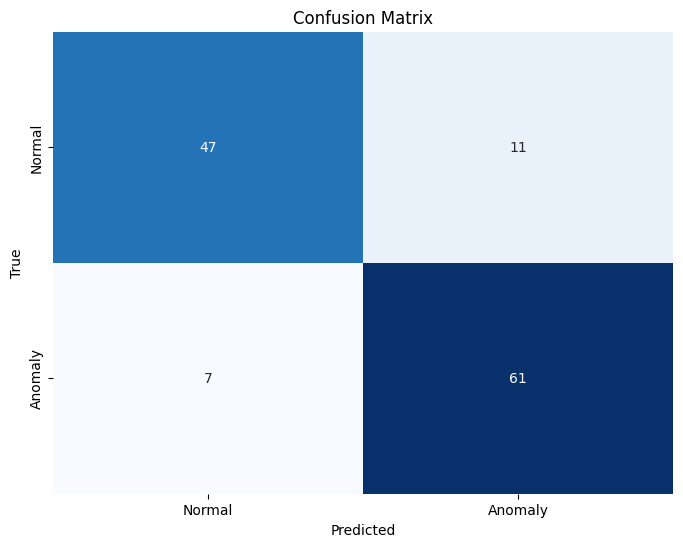

In [11]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        58
           1       0.85      0.90      0.87        68

    accuracy                           0.86       126
   macro avg       0.86      0.85      0.86       126
weighted avg       0.86      0.86      0.86       126



In [13]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

4/4 [==============================] - 0s 4ms/step - loss: 0.3957 - accuracy: 0.8571
Test Loss: 0.39573633670806885, Test Accuracy: 0.8571428656578064
